In [168]:
# %pip install scikit-fuzzy
# %pip install numpy
# %pip install scipy
# %pip install networkx

In [169]:
# Importa as bibliotecas necessárias
import numpy as np  # Biblioteca para operações numéricas e manipulação de arrays
import skfuzzy as fuzz  # Biblioteca para lógica fuzzy
from skfuzzy import control as ctrl  # Módulo para criar e manipular sistemas de controle fuzzy

In [170]:
# Cria um array de valores de 0 a 10 com passo de 1
np.arange(0, 11, 1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [171]:
# Cria a variável fuzzy de entrada 'qualidade' com valores variando de 0 a 10
qualidade = ctrl.Antecedent(np.arange(0, 11, 1), 'qualidade')

# Cria a variável fuzzy de entrada 'servico' com valores variando de 0 a 10
servico = ctrl.Antecedent(np.arange(0, 11, 1), 'servico')

# Cria a variável fuzzy de saída 'gorjeta' com valores variando de 0 a 20
gorjeta = ctrl.Consequent(np.arange(0, 21, 1), 'gorjeta')

In [172]:
# Exibe a variável 'qualidade' para verificar sua definição
qualidade

Antecedent: qualidade

In [173]:
# Retorna o intervalo de valores para a variável 'qualidade'
qualidade.universe


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

## Membership functions

In [174]:
# Cria funções de pertinência automáticas para a variável 'qualidade'
# Define três funções: 'ruim', 'boa' e 'saborosa'
qualidade.automf(number=3, names=['ruim', 'boa', 'saborosa'])

# Cria funções de pertinência automáticas para a variável 'servico'
# Define três funções: 'ruim', 'aceitável' e 'ótimo'
servico.automf(number=3, names=['ruim', 'aceitável', 'ótimo'])

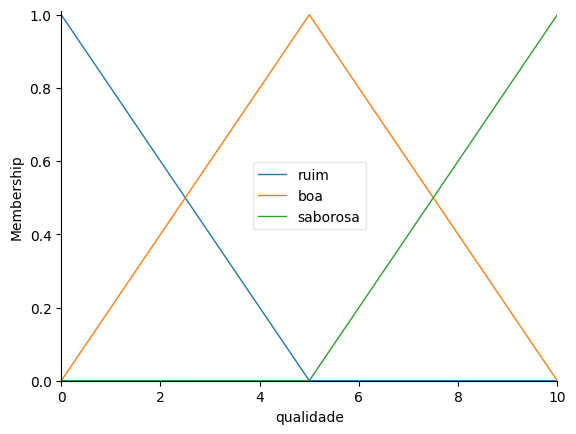

In [175]:
# Exibe os gráficos das funções de pertinência para a variável 'qualidade'
qualidade.view()

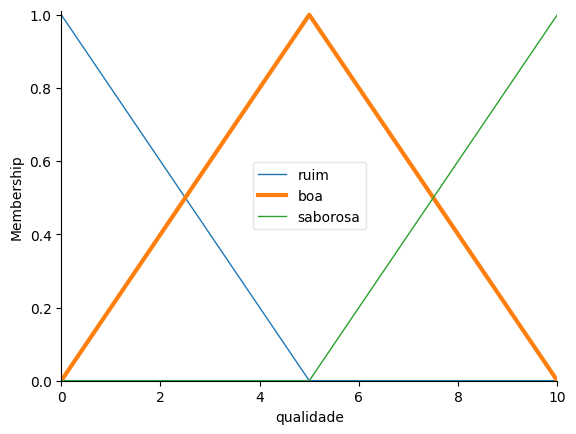

In [176]:
# Exibe o gráfico da função de pertinência específica para o termo 'saborosa' na variável 'qualidade'
qualidade['boa'].view()

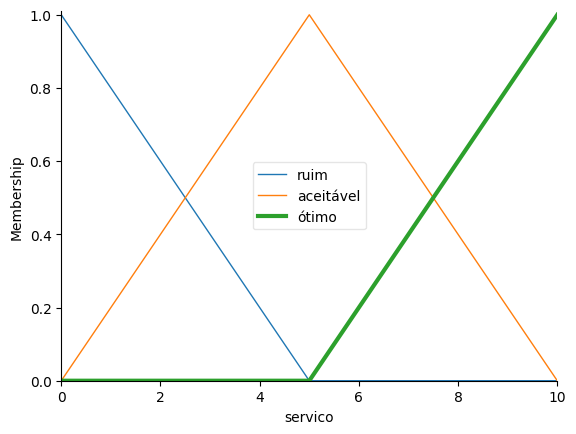

In [177]:
# Exibe os gráficos das funções de pertinência para a variável 'servico'
servico['ótimo'].view()

In [178]:
# Retorna o intervalo de valores para a variável 'gorjeta'
gorjeta.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [179]:
# Para a função sigmoide, forneça todos os parâmetros necessários
gorjeta['baixa'] = fuzz.sigmf(gorjeta.universe, 5, -1)  

# Para a função gaussiana, use 'mean' e 'sigma' como parâmetros
gorjeta['media'] = fuzz.gaussmf(gorjeta.universe, 10, 3)  

# Para a função trapezoidal, use 'a', 'b', 'c' e 'd' como parâmetros
gorjeta['alta'] = fuzz.pimf(gorjeta.universe, 10, 20, 20, 21)

In [180]:
# Define funções de pertinência específicas para a variável 'gorjeta'
# Cria três funções triangulares:
# 'baixa' com base variando de 0 a 8
# 'media' com base variando de 2 a 18 e pico em 10
# 'alta' com base variando de 12 a 20
# gorjeta['baixa'] = fuzz.trimf(gorjeta.universe, [0, 0, 8])
# gorjeta['media'] = fuzz.trimf(gorjeta.universe, [2, 10, 18])
# gorjeta['alta'] = fuzz.trimf(gorjeta.universe, [12, 20, 20])

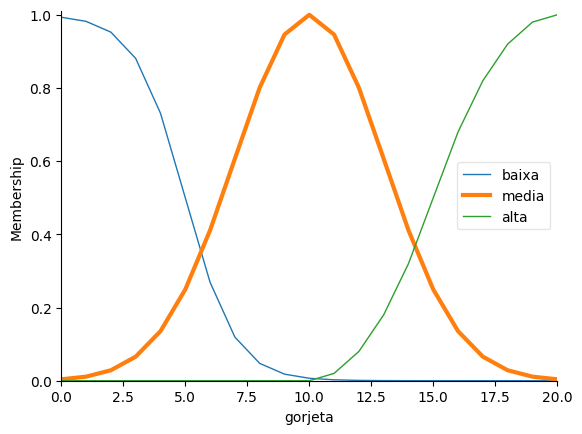

In [188]:
# Exibe os gráficos das funções de pertinência para a variável 'gorjeta'
gorjeta['media'].view()

In [182]:
# Define as regras fuzzy
# Regra 1: Se a qualidade for 'ruim' ou o serviço for 'ruim', a gorjeta será 'baixa'
regra1 = ctrl.Rule(qualidade['ruim'] | servico['ruim'], gorjeta['baixa'])

# Regra 2: Se o serviço for 'aceitável', a gorjeta será 'média'
regra2 = ctrl.Rule(servico['aceitável'], gorjeta['media'])

# Regra 3: Se o serviço for 'ótimo' ou a qualidade for 'saborosa', a gorjeta será 'alta'
regra3 = ctrl.Rule(servico['ótimo'] | qualidade['saborosa'], gorjeta['alta'])

## Sistema de controle

In [183]:
# Cria o sistema de controle fuzzy com as regras definidas
sistema_controle = ctrl.ControlSystem([regra1, regra2, regra3])

In [184]:
# Cria uma instância do simulador do sistema de controle fuzzy
sistema = ctrl.ControlSystemSimulation(sistema_controle)

In [189]:
# Define os valores de entrada para a simulação
# Qualidade = 10, Serviço = 10
sistema.input['qualidade'] = 0
sistema.input['servico'] = 10

# Calcula a saída com base nas entradas fornecidas e nas regras definidas
sistema.compute()

9.947566369429438


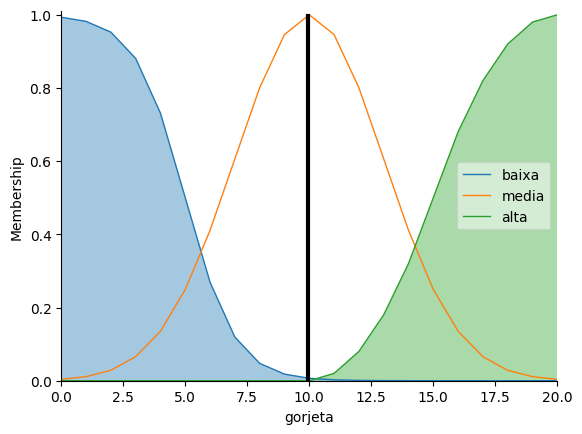

In [190]:
# Imprime o valor da gorjeta calculada pela simulação
print(sistema.output['gorjeta'])

# Exibe o gráfico da variável 'gorjeta' com base na simulação realizada
gorjeta.view(sim = sistema)